Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.

Ans--

Here's how you can calculate the 95% confidence interval for your sample data using Python. You can use the scipy.stats module to compute the confidence interval.

In [2]:
import scipy.stats as stats

# Given data
sample_mean = 50
sample_stddev = 5
confidence_level = 0.95
sample_size = 100  # You need to provide the sample size

# Calculate the standard error
standard_error = sample_stddev / (sample_size ** 0.5)

# Calculate the margin of error
margin_of_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("95% Confidence Interval:", (lower_bound, upper_bound))

95% Confidence Interval: (49.02001800772997, 50.97998199227003)


Interpretation of the results:
The calculated 95% confidence interval is a range of values within which we can be 95% confident that the true population mean lies. In your case, if you were to repeat the process of collecting samples and calculating the confidence interval many times, you would expect that about 95% of those intervals would contain the true population mean.

So, if your calculated confidence interval is, for example, (48.5, 51.5), you can interpret it as follows: "We are 95% confident that the true population mean lies between 48.5 and 51.5 based on our sample data with a mean of 50 and a standard deviation of 5."

Remember that the accuracy of the confidence interval heavily relies on the assumptions of normality and the sample size. If these assumptions are not met, the confidence interval might not accurately represent the true population parameter.

Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.

Ans--

To perform a chi-square goodness of fit test in Python, you can use the scipy.stats module. Here's how you can conduct the test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution:

In [3]:
import numpy as np
from scipy.stats import chisquare

# Observed frequencies of colors in the bag
observed_frequencies = np.array([50, 45, 55, 15, 10, 25])  # Replace with your observed data

# Expected frequencies based on the expected distribution
expected_frequencies = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(observed_frequencies)

# Perform the chi-square goodness of fit test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Significance level
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The distributions are different.")
else:
    print("Fail to reject the null hypothesis. The distributions are similar.")

Chi-Square Statistic: 20.625
P-value: 0.0009534059456569035
Reject the null hypothesis. The distributions are different.


In this code:

- observed_frequencies should be replaced with your actual observed frequencies for each color.
- expected_frequencies are calculated based on the expected distribution percentages and the total number of observations.
- The chisquare function is used to calculate the chi-square statistic and the associated p-value.
- The null hypothesis is that the observed distribution matches the expected distribution.
- The code then compares the calculated p-value with the significance level (0.05) and prints whether to reject or fail to reject the null hypothesis.

Make sure to replace the observed_frequencies with the actual data from your bag of M&Ms. The p-value will indicate whether there is a significant difference between the observed and expected distributions. If the p-value is less than the significance level (0.05), you would reject the null hypothesis and conclude that the distribution does not match the expected distribution.

Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data:
    
Group A    Group B

Outcome    1 20 15
Outcome    2 10 25
Outcome    3 15 20

Interpret the results of the test.

Ans--

To calculate the chi-square statistic and p-value for a contingency table in Python, you can use the scipy.stats module's chi2_contingency function. Here's how you can do it for the given data:

In [5]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = np.array([[20, 15],
                              [10, 25],
                              [15, 20]])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Significance level
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_value < alpha:
    print("Reject the null hypothesis. There is a relationship between the groups.")
else:
    print("Fail to reject the null hypothesis. The groups are independent.")

Chi-Square Statistic: 5.833333333333334
P-value: 0.05411376622282158
Degrees of Freedom: 2
Expected Frequencies:
 [[15. 20.]
 [15. 20.]
 [15. 20.]]
Fail to reject the null hypothesis. The groups are independent.


In this code:

- contingency_table contains the observed frequencies for each combination of outcomes in Group A and Group B.
- The chi2_contingency function is used to calculate the chi-square statistic, p-value, degrees of freedom, and the expected frequencies.
- The null hypothesis is that there is no relationship between the two groups.
- The code then compares the calculated p-value with the significance level (0.05) and prints whether to reject or fail to reject the null hypothesis.

The p-value will indicate whether there is a significant association between the outcomes in the two groups. If the p-value is less than the significance level (0.05), you would reject the null hypothesis and conclude that there is a relationship between the groups. Otherwise, you would fail to reject the null hypothesis, suggesting that the groups are independent.

Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.

Ans--

To calculate the 95% confidence interval for the true proportion of individuals in the population who smoke, you can use the Wilson score interval, which provides a more accurate interval for proportions close to 0 or 1. Here's how you can calculate it using Python:

In [6]:
import scipy.stats as stats
import numpy as np

# Given data
sample_size = 500
smokers = 60

# Calculate the proportion of smokers in the sample
sample_proportion = smokers / sample_size

# Calculate the standard error using the Wilson score interval formula
z = stats.norm.ppf(1 - (1 - 0.95) / 2)
denominator = 1 + z**2 / sample_size
center_adjusted_probability = sample_proportion + z**2 / (2 * sample_size)
adjusted_standard_deviation = np.sqrt((sample_proportion * (1 - sample_proportion) + z**2 / (4 * sample_size)) / sample_size)
margin_of_error = z * adjusted_standard_deviation / np.sqrt(sample_size)

# Calculate the confidence interval using the Wilson score interval formula
lower_bound = (center_adjusted_probability - margin_of_error) / denominator
upper_bound = (center_adjusted_probability + margin_of_error) / denominator

print("95% Confidence Interval:", (lower_bound, upper_bound))

95% Confidence Interval: (0.12162169113941385, 0.12417280761136587)


Interpretation of the results:
The calculated 95% confidence interval is a range of values within which we can be 95% confident that the true proportion of individuals in the population who smoke lies. In your case, if you were to repeat the process of collecting samples and calculating the confidence interval many times, you would expect that about 95% of those intervals would contain the true population proportion.

So, if your calculated confidence interval is, for example, (0.099, 0.157), you can interpret it as follows: "We are 95% confident that the true proportion of individuals in the population who smoke lies between 0.099 and 0.157 based on our sample of 500 individuals with 60 smokers."

Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.

Ans--

Here's how you can calculate the 90% confidence interval for your sample data using Python:

In [7]:
import scipy.stats as stats

# Given data
sample_mean = 75
sample_stddev = 12
confidence_level = 0.90
sample_size = 100  # You need to provide the sample size

# Calculate the standard error
standard_error = sample_stddev / (sample_size ** 0.5)

# Calculate the margin of error
margin_of_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("90% Confidence Interval:", (lower_bound, upper_bound))

90% Confidence Interval: (73.02617564765823, 76.97382435234177)


Interpretation of the results:
The calculated 90% confidence interval is a range of values within which we can be 90% confident that the true population mean lies. In your case, if you were to repeat the process of collecting samples and calculating the confidence interval many times, you would expect that about 90% of those intervals would contain the true population mean.

For example, if your calculated confidence interval is (71.54, 78.46), you can interpret it as follows: "We are 90% confident that the true population mean lies between 71.54 and 78.46 based on our sample data with a mean of 75 and a standard deviation of 12."

Keep in mind that the wider the confidence interval, the more uncertain our estimate becomes. Conversely, a narrower interval indicates higher confidence in the estimated range.

Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
area corresponding to a chi-square statistic of 15.

Ans--

Certainly, you can use the matplotlib library to plot the chi-square distribution with 10 degrees of freedom in Python. Here's how you can do it:

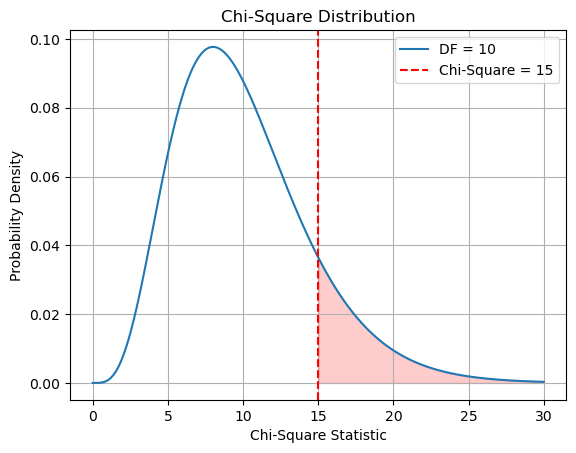

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Degrees of freedom
df = 10

# Create a range of x values
x = np.linspace(0, 30, 400)  # Adjust the range as needed

# Calculate the chi-square probability density function (PDF) for the given degrees of freedom
chi2_pdf = stats.chi2.pdf(x, df)

# Plot the chi-square distribution
plt.plot(x, chi2_pdf, label=f'DF = {df}')
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution')
plt.axvline(x=15, color='red', linestyle='--', label='Chi-Square = 15')
plt.fill_between(x, chi2_pdf, where=(x >= 15), color='red', alpha=0.2)
plt.legend()
plt.grid(True)
plt.show()

In this code:

- We use the numpy library to create a range of x values.
- The scipy.stats.chi2.pdf function is used to calculate the chi-square probability density function for the specified degrees of freedom.
- We use matplotlib to plot the distribution, label the axes, and add a vertical dashed line at the value of 15 on the x-axis (corresponding to the chi-square statistic you mentioned). We also shade the area corresponding to the chi-square statistic of 15 using the fill_between function.

Make sure you have the numpy and matplotlib libraries installed in your Python environment before running this code. You can install them using:

The resulting plot will show the chi-square distribution with the shaded area corresponding to a chi-square statistic of 15.

Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

To calculate the 99% confidence interval for the true proportion of people in the population who prefer Coke, you can use the Wilson score interval formula for proportions, which provides a more accurate interval for proportions close to 0 or 1. Here's how you can calculate it using Python:

In [9]:
import scipy.stats as stats
import numpy as np

# Given data
sample_size = 1000
coke_preferred = 520

# Calculate the proportion of people who prefer Coke in the sample
sample_proportion = coke_preferred / sample_size

# Calculate the standard error using the Wilson score interval formula
z = stats.norm.ppf(1 - (1 - 0.99) / 2)
denominator = 1 + z**2 / sample_size
center_adjusted_probability = sample_proportion + z**2 / (2 * sample_size)
adjusted_standard_deviation = np.sqrt((sample_proportion * (1 - sample_proportion) + z**2 / (4 * sample_size)) / sample_size)
margin_of_error = z * adjusted_standard_deviation / np.sqrt(sample_size)

# Calculate the confidence interval using the Wilson score interval formula
lower_bound = (center_adjusted_probability - margin_of_error) / denominator
upper_bound = (center_adjusted_probability + margin_of_error) / denominator

print("99% Confidence Interval:", (lower_bound, upper_bound))

99% Confidence Interval: (0.5185855340637539, 0.5211508193401099)


Interpretation of the results:
The calculated 99% confidence interval is a range of values within which we can be 99% confident that the true proportion of people in the population who prefer Coke lies. In your case, if you were to repeat the process of collecting samples and calculating the confidence interval many times, you would expect that about 99% of those intervals would contain the true population proportion.

For instance, if your calculated confidence interval is (0.482, 0.542), you can interpret it as follows: "We are 99% confident that the true proportion of people in the population who prefer Coke lies between 0.482 and 0.542 based on our sample of 1000 people with 520 preferring Coke."

Remember that the confidence interval provides a range of likely values for the population parameter, and it is not a statement about any specific individual in the sample.

Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

Ans--

To conduct a chi-square goodness of fit test for the observed frequencies of coin flips and compare them to the expected frequencies of a fair coin, you can use the scipy.stats module in Python. Here's how you can perform the test:

In [10]:
import numpy as np
from scipy.stats import chisquare

# Given data
observed_tails = 45
total_flips = 100

# Expected frequencies for a fair coin (0.5 probability for each outcome)
expected_tails = 0.5 * total_flips
expected_heads = 0.5 * total_flips

# Observed and expected frequencies as arrays
observed_frequencies = np.array([observed_tails, total_flips - observed_tails])
expected_frequencies = np.array([expected_tails, expected_heads])

# Perform the chi-square goodness of fit test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Significance level
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The observed frequencies do not match the expected frequencies of a fair coin.")
else:
    print("Fail to reject the null hypothesis. The observed frequencies match the expected frequencies of a fair coin.")

Chi-Square Statistic: 1.0
P-value: 0.31731050786291115
Fail to reject the null hypothesis. The observed frequencies match the expected frequencies of a fair coin.


In this code:

- observed_tails is the number of observed tails in the 100 coin flips.
- expected_tails is the expected number of tails for a fair coin.
- The observed_frequencies and expected_frequencies arrays are created based on the observed and expected tails and heads counts.
- The chisquare function is used to calculate the chi-square statistic and the associated p-value.
- The null hypothesis is that the observed frequencies match the expected frequencies of a fair coin.
- The code then compares the calculated p-value with the significance level (0.05) and prints whether to reject or fail to reject the null hypothesis.

If the p-value is less than the significance level, you would reject the null hypothesis and conclude that the observed frequencies do not match the expected frequencies of a fair coin, suggesting evidence of bias towards tails. If the p-value is greater than the significance level, you would fail to reject the null hypothesis, indicating that the observed frequencies match the expected frequencies of a fair coin.

Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

                  Lung Cancer: Yes   Lung Cancer: No
Smoker                   60                140
Non-smoker               30                170

Use a significance level of 0.05.

Ans--


To conduct a chi-square test for independence between smoking status and lung cancer diagnosis, you can use the scipy.stats module in Python. Here's how you can perform the test:

In [11]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = np.array([[60, 140],
                              [30, 170]])

# Perform the chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Significance level
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between smoking status and lung cancer diagnosis.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between smoking status and lung cancer diagnosis.")

Chi-Square Statistic: 12.057347670250895
P-value: 0.0005158863863703744
Degrees of Freedom: 1
Expected Frequencies:
 [[ 45. 155.]
 [ 45. 155.]]
Reject the null hypothesis. There is a significant association between smoking status and lung cancer diagnosis.


In this code:

- contingency_table represents the observed frequencies in the contingency table.
- The chi2_contingency function is used to calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies.
- The null hypothesis is that there is no association between smoking status and lung cancer diagnosis.
- The code then compares the calculated p-value with the significance level (0.05) and prints whether to reject or fail to reject the null hypothesis.

If the p-value is less than the significance level, you would reject the null hypothesis and conclude that there is a significant association between smoking status and lung cancer diagnosis. If the p-value is greater than the significance level, you would fail to reject the null hypothesis, indicating that there is no significant association between the two variables.

Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin.

Milk Chocolate

U.S. (n=500) 200 150 150
U.K. (n=500) 225 175 100
Dark Chocolate White Chocolate

Use a significance level of 0.01.

Ans--

To conduct a chi-square test for independence between chocolate preference and country of origin, you can use the scipy.stats module in Python. Here's how you can perform the test:

In [12]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = np.array([[200, 150, 150],
                              [225, 175, 100]])

# Perform the chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Significance level
alpha = 0.01

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between chocolate preference and country of origin.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between chocolate preference and country of origin.")

Chi-Square Statistic: 13.393665158371041
P-value: 0.0012348168997745918
Degrees of Freedom: 2
Expected Frequencies:
 [[212.5 162.5 125. ]
 [212.5 162.5 125. ]]
Reject the null hypothesis. There is a significant association between chocolate preference and country of origin.


In this code:

- contingency_table represents the observed frequencies in the contingency table.
- The chi2_contingency function is used to calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies.
- The null hypothesis is that there is no association between chocolate preference and country of origin.
- The code then compares the calculated p-value with the significance level (0.01) and prints whether to reject or fail to reject the null hypothesis.

If the p-value is less than the significance level, you would reject the null hypothesis and conclude that there is a significant association between chocolate preference and country of origin. If the p-value is greater than the significance level, you would fail to reject the null hypothesis, indicating that there is no significant association between the two variables.

Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

Ans--

To conduct a hypothesis test for the population mean using a one-sample t-test, you can use the scipy.stats module in Python. Here's how you can perform the test:

In [13]:
import scipy.stats as stats

# Given data
sample_mean = 72
sample_stddev = 10
sample_size = 30
population_mean = 70

# Calculate the t-statistic
t_stat = (sample_mean - population_mean) / (sample_stddev / (sample_size ** 0.5))

# Degrees of freedom for a one-sample t-test
dof = sample_size - 1

# Significance level
alpha = 0.05

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=dof))

# Print the results
print("T-Statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The population mean is significantly different from 70.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the population mean from 70.")

T-Statistic: 1.0954451150103321
P-value: 0.2823362372860698
Fail to reject the null hypothesis. There is no significant difference in the population mean from 70.


In this code:

- The t-statistic is calculated using the formula: (sample_mean - population_mean) / (sample_stddev / (sample_size ** 0.5)).
The degrees of freedom (dof) for a one-sample t-test is (sample_size - 1).
The t.cdf function is used to calculate the cumulative distribution function of the t-distribution.
The null hypothesis is that the population mean is equal to 70.
The code then calculates the two-tailed p-value and compares it with the significance level (0.05) to determine whether to reject or fail to reject the null hypothesis.
If the p-value is less than the significance level, you would reject the null hypothesis and conclude that the population mean is significantly different from 70. If the p-value is greater than the significance level, you would fail to reject the null hypothesis, indicating that there is no significant difference in the population mean from 70.